## 1. Simple Linear Regression

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

$ y = m*x+c $

Reshaping is done because SKLEARN always expects 2D arrrays

In [13]:
x = np.random.randn(10000)
X = x.reshape(10000,1)

In [14]:
x.shape

(10000,)

In [15]:
X.shape

(10000, 1)

Noise is added to give Realistic feel

In [16]:
y = 100*x + 5 + 40*np.random.randn(10000)

In [6]:
y_clean = 100*x + 5

The X axis is the Model Input (Features) and the y part is the Labels (Target variable)

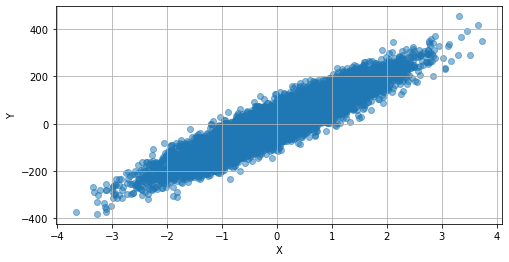

In [8]:
plt.figure(figsize=(8,4))
plt.scatter(x,y, alpha=0.5)
plt.xlabel('X') ; plt.ylabel('Y')
plt.grid()

###### Step 0 is always to import respective model class from SKLEARN

In [17]:
from sklearn.linear_model import LinearRegression

#### Step 1 : to initialize the model

In [18]:
model = LinearRegression()

#### Step 2: Model Training/Fitting
This is where model understands mapping bw X and y.
If y = f(x) this is where model understands/machine understands what f is ?

In [11]:
model.fit(X,y)

LinearRegression()

Predicting yp for X

In [12]:
yp = model.predict(X)

In [13]:
df_simpleReg = pd.DataFrame({'X':x, 'y':y, 'yp':yp})

In [14]:
df_simpleReg

,X,y,yp
0,0.707105,-0.511089,75.865566
1,0.584917,-0.716452,63.731619
2,-0.700618,-113.802011,-63.928784
3,-0.715723,-98.204505,-65.428831
4,-0.716086,-27.751938,-65.464830
...,...,...,...
9995,1.714181,193.514495,175.873530
9996,1.305888,125.848361,135.327908
9997,-1.624621,-149.457292,-155.687189
9998,0.321935,8.886609,37.616198


#### Overfitting : When Machine Learns the Noise as well. Noise is to be ignored, the real trend has to be captured. 

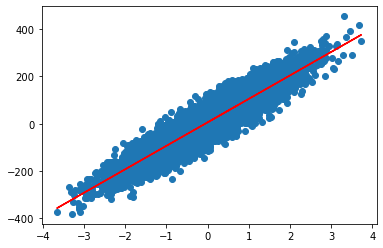

In [15]:
plt.scatter(x,y)
plt.plot(x,yp, color='red')

In [16]:
X_new = [[ 2.5 ]]

In [17]:
model.predict(X_new)

array([253.90955104])

In [18]:
model.coef_ , model.intercept_

(array([99.30530067]), 5.646299373104597)

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
mse(y, yp)

NameError: name 'yp' is not defined

## 2. Multiple Linear Regression

In [4]:
x1 = np.random.randn(100)
x2 = np.random.randn(100) + 50
m1 = 5
m2 = 10
c = 200

In [5]:
y_12 = m1*x1 + m2*x2 + c + 40*np.random.randn(100)

In [6]:
df_multiReg = pd.DataFrame({'X1':x1, 'X2':x2,'y':y_12})

In [10]:
df_multiReg

,X1,X2,y
0,-0.374508,50.556778,757.492742
1,-1.942125,48.976292,688.099094
2,-0.498341,49.618382,666.433272
3,-1.107692,49.173909,665.748640
4,0.436956,50.570978,740.427643
...,...,...,...
95,1.895779,50.618471,708.365220
96,1.515810,50.828975,735.743972
97,-0.040150,49.908699,734.226951
98,-0.439929,49.563873,731.740960


In [19]:
model_2 = LinearRegression()

In [20]:
X_train_2d = df_multiReg[['X1', 'X2']] #X part of the Data

In [21]:
y_train_2d = df_multiReg['y'] #y part of the data

In [22]:
model_2.fit(X_train_2d, y_train_2d)

LinearRegression()

In [23]:
yp_2d = model_2.predict(X_train_2d)

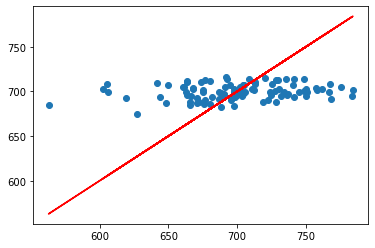

In [43]:
plt.scatter(y_train_2d, yp_2d)
plt.plot(y_train_2d, y_train_2d, color='red')

In [30]:
model_2.coef_

array([4.57365234, 8.29881284])

In [31]:
model_2.intercept_

285.4366925473894

In [32]:
model_2.predict([[10,20]])

array([497.14947271])

In [33]:
from sklearn.metrics import mean_squared_error as mse

In [34]:
mse(y_12, yp_2d)

1621.098247368895

## 3. Reservoir Engineering Application of ML
How would a Machine Learn a correlation? If it does, can we say that if we have data, we don't need to depend on predefined Correlations?

In [44]:
df_phiK = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/PhiK.csv', index_col=0)

### EDA : Exploratory Data Analysis

In [45]:
df_phiK.head()

,Porosity,Swc,Permeability(D)
0,0.269158,0.114209,2.042529
1,0.324275,0.072078,11.639989
2,0.218003,0.101849,1.015917
3,0.211875,0.099354,0.941715
4,0.322281,0.083444,8.452433


In [47]:
df_phiK.describe()

,Porosity,Swc,Permeability(D)
count,70000.000000,70000.000000,70000.000000
mean,0.250099,0.099978,2.615701
std,0.050335,0.010008,2.386541
min,0.042789,0.054212,0.000679
25%,0.216020,0.093231,1.010082
50%,0.249907,0.099990,1.936386
75%,0.284033,0.106762,3.460038
max,0.478269,0.141312,38.662256


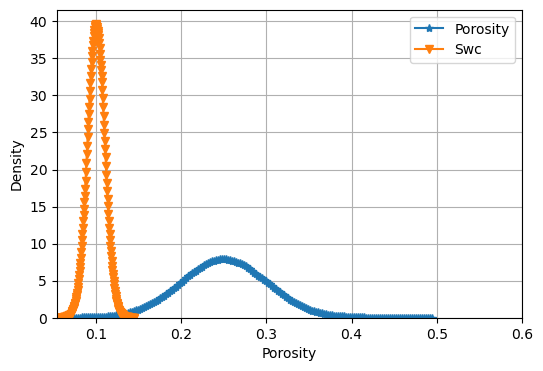

In [50]:
plt.style.use('default')
plt.figure(figsize=(6,4))
sns.kdeplot(df_phiK['Porosity'],label='Porosity',marker='*')
sns.kdeplot(df_phiK['Swc'],label='Swc',marker='v')

plt.xlim(min(df_phiK['Swc']), 0.6)

plt.grid()
plt.legend()

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = df_phiK[['Porosity', 'Swc']]

y = df_phiK['Permeability(D)']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
yp_k_train =rf_model.predict(X_train)

In [62]:
yp_k_test = rf_model.predict(X_test)

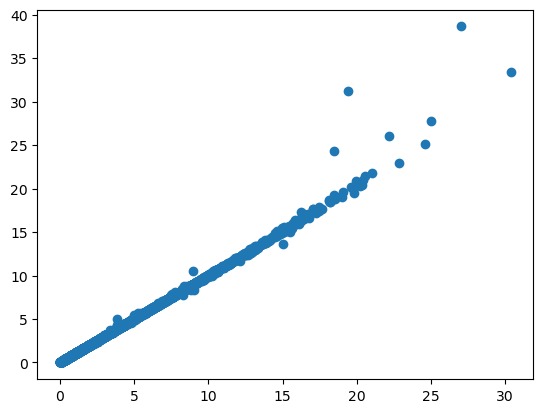

In [64]:
plt.scatter(yp_k_test, y_test)

In [65]:
mse_train = mse(y_train, yp_k_train)
mse_test = mse(y_test, yp_k_test)

In [66]:
mse_test, mse_train

(0.01752596838304188, 0.0006175470389561037)

## Classification

### 1. Logistic Regression

In [67]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [68]:
X, y = load_iris(return_X_y=True)

In [69]:
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
clf.predict(X[:2, :])

array([0, 0])

In [71]:
clf.predict_proba(X[:2, :])

array([[9.81783333e-01, 1.82166528e-02, 1.43248580e-08],
       [9.71693564e-01, 2.83064063e-02, 2.99692978e-08]])

In [72]:
clf.score(X, y)

0.9733333333333334

## Real world Oil & Gas ML Examples :-

The aim is to use all other features and train a model that can approximately understand and Predict Temperature. If it works well and trains on more and more data, we can replace sensors with ML Models.

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

In [94]:
df.head()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

<AxesSubplot:>

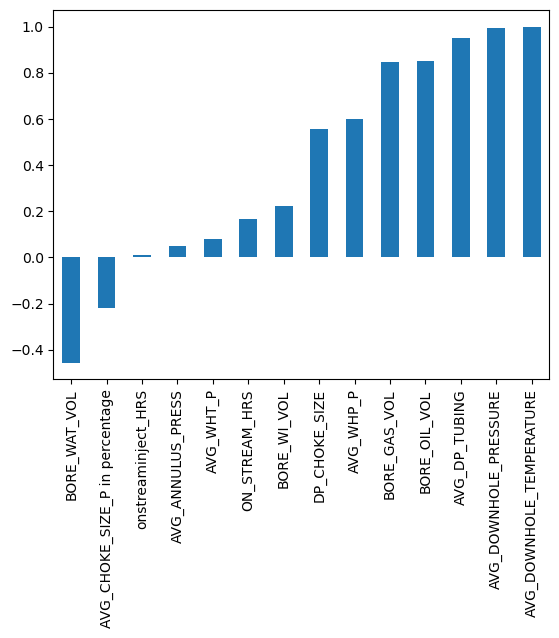

In [96]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values().plot(kind='bar')

In [97]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values()

BORE_WAT_VOL                     -0.456028
AVG_CHOKE_SIZE_P in percentage   -0.220456
onstreaminject_HRS                0.012351
AVG_ANNULUS_PRESS                 0.050419
AVG_WHT_P                         0.077749
ON_STREAM_HRS                     0.165454
BORE_WI_VOL                       0.221163
DP_CHOKE_SIZE                     0.556476
AVG_WHP_P                         0.600172
BORE_GAS_VOL                      0.845233
BORE_OIL_VOL                      0.850241
AVG_DP_TUBING                     0.952678
AVG_DOWNHOLE_PRESSURE             0.995501
AVG_DOWNHOLE_TEMPERATURE          1.000000
Name: AVG_DOWNHOLE_TEMPERATURE, dtype: float64

In [98]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [99]:
df.head(2)

,BORE_WAT_VOL,DP_CHOKE_SIZE,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,BORE_OIL_VOL,AVG_DOWNHOLE_TEMPERATURE
2007-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


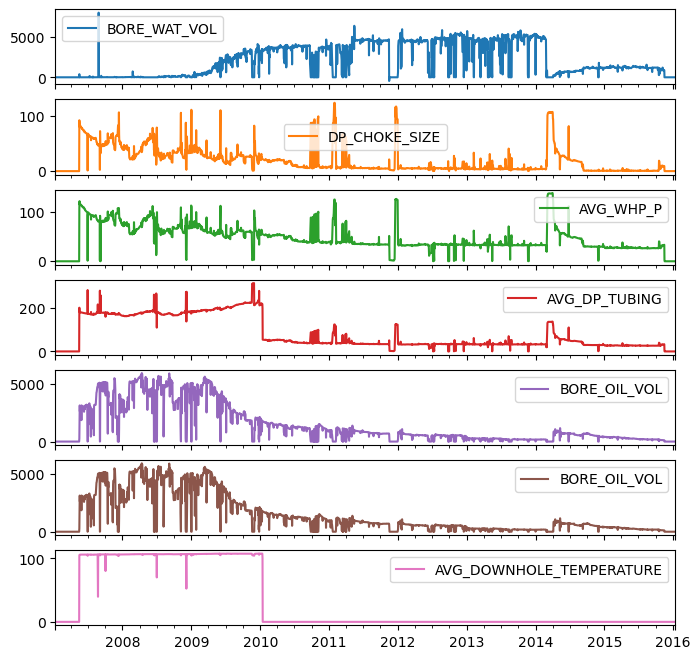

In [100]:
df.plot(figsize=(8,8) , subplots=True);

In [101]:
df = df[df.index.year <2010]

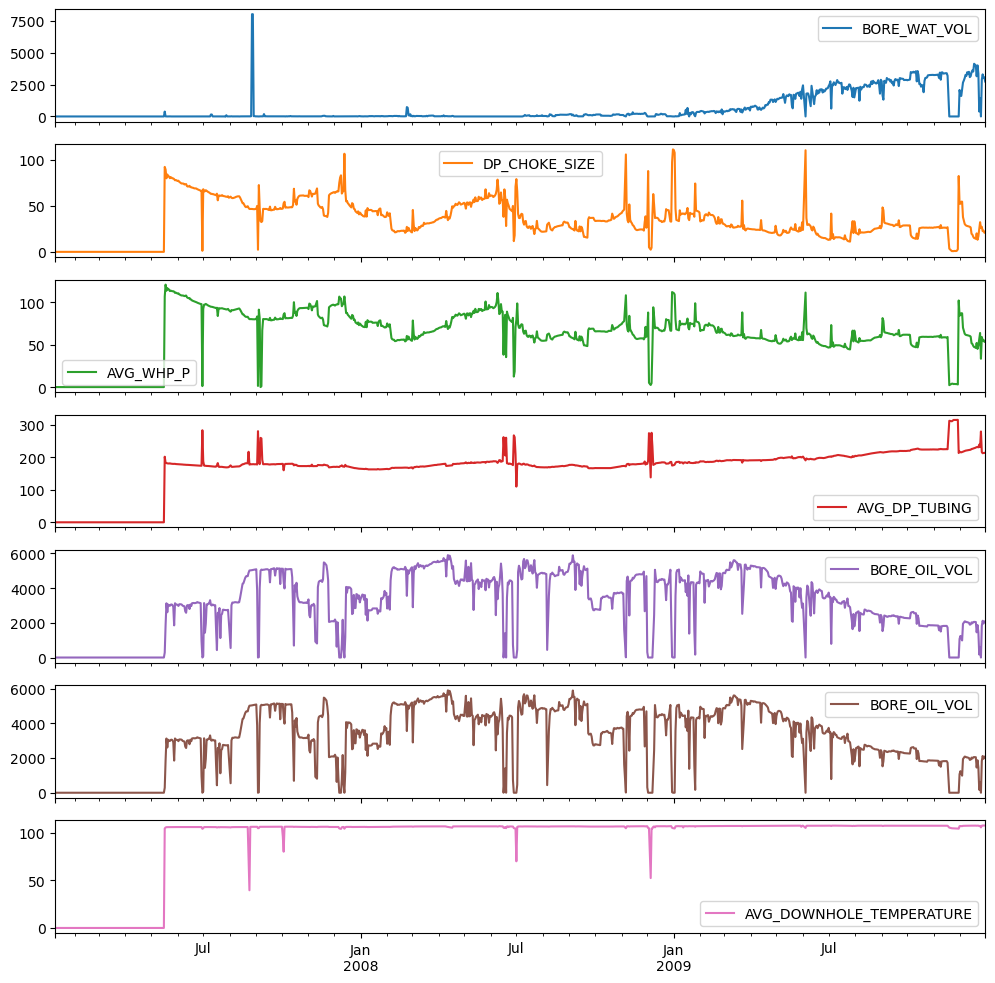

In [102]:
df.plot(figsize=(12,12) , subplots=True);

In [103]:
out = 'AVG_DOWNHOLE_TEMPERATURE'

In [104]:
df_train = df.iloc[:1000,:]
df_test = df.iloc[1000:,:]

In [105]:
X_train = df_train.drop(out, axis=1) ; y_train = df_train[out]
X_test = df_test.drop(out , axis=1) ; y_test = df_test[out]

In [106]:
y_train

2007-01-09      0.000
2007-01-10      0.000
2007-01-11      0.000
2007-01-12      0.000
2007-01-13      0.000
               ...   
2009-09-30    107.313
2009-10-01    107.312
2009-10-02    107.312
2009-10-03    107.310
2009-10-04    107.311
Name: AVG_DOWNHOLE_TEMPERATURE, Length: 1000, dtype: float64

In [107]:
X_train.shape , y_train.shape

((1000, 6), (1000,))

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
S = StandardScaler()

In [110]:
X_train_scaled = S.fit_transform(X_train) 
X_test_scaled = S.transform(X_test)

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [112]:
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=200)

In [115]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=200)

In [116]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

(13672.0, 14609.0)

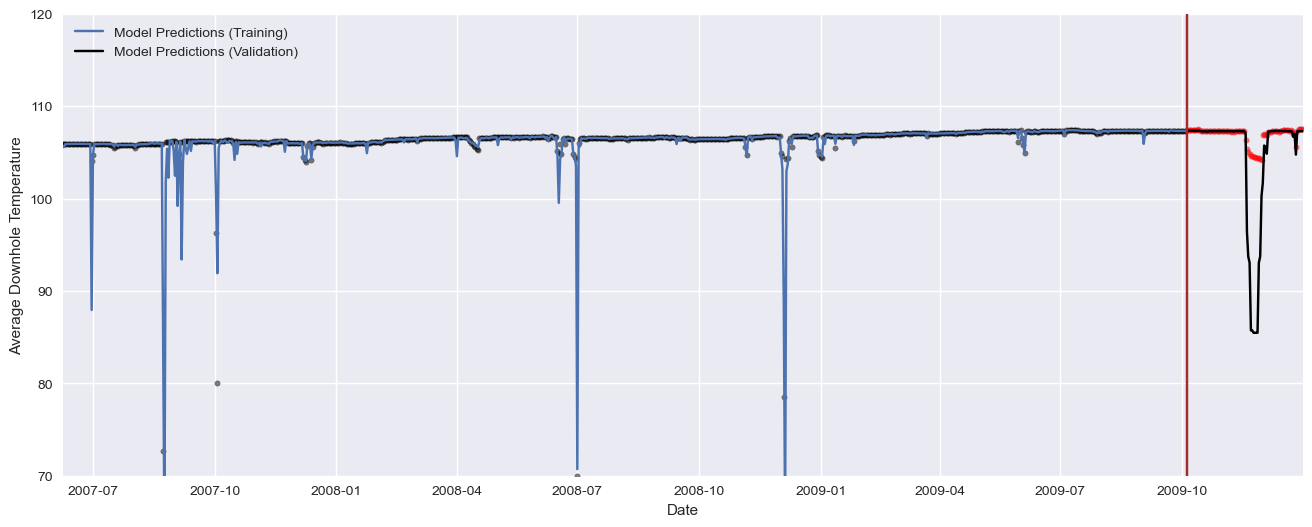

In [117]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='black', alpha=0.5, s=15)
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')

plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])